C:\Users\avisa\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error (MSE): 2419721731.024102
R-squared (R2): 0.6845347035231939


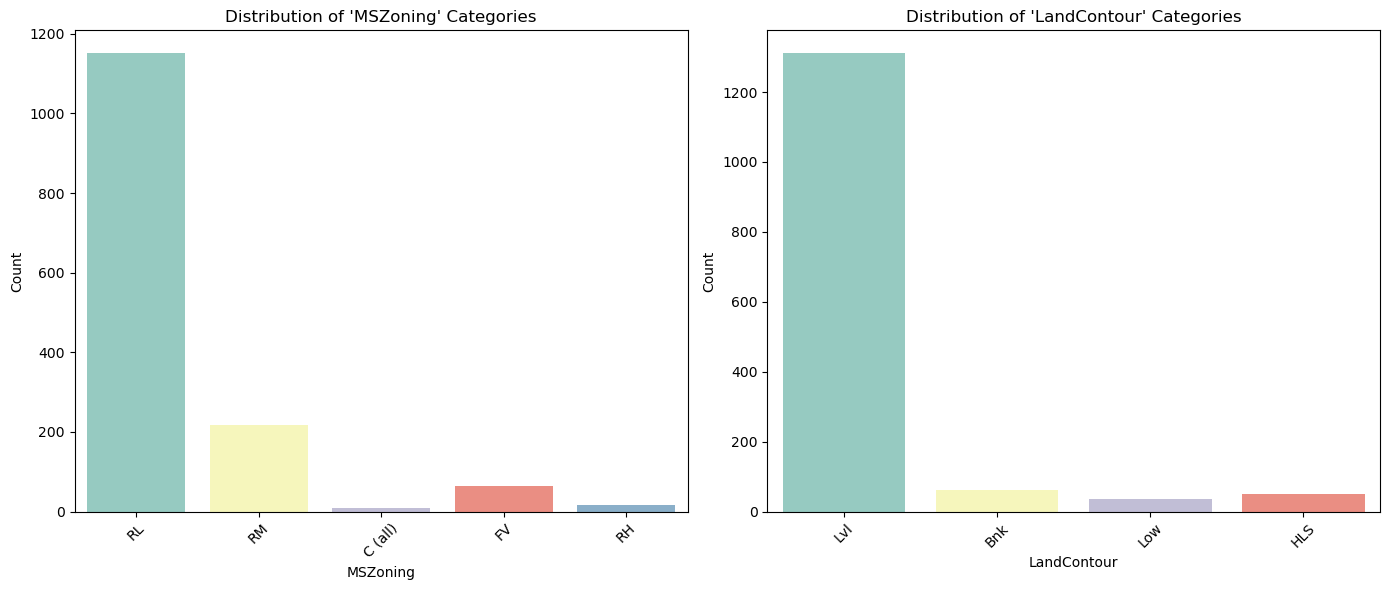

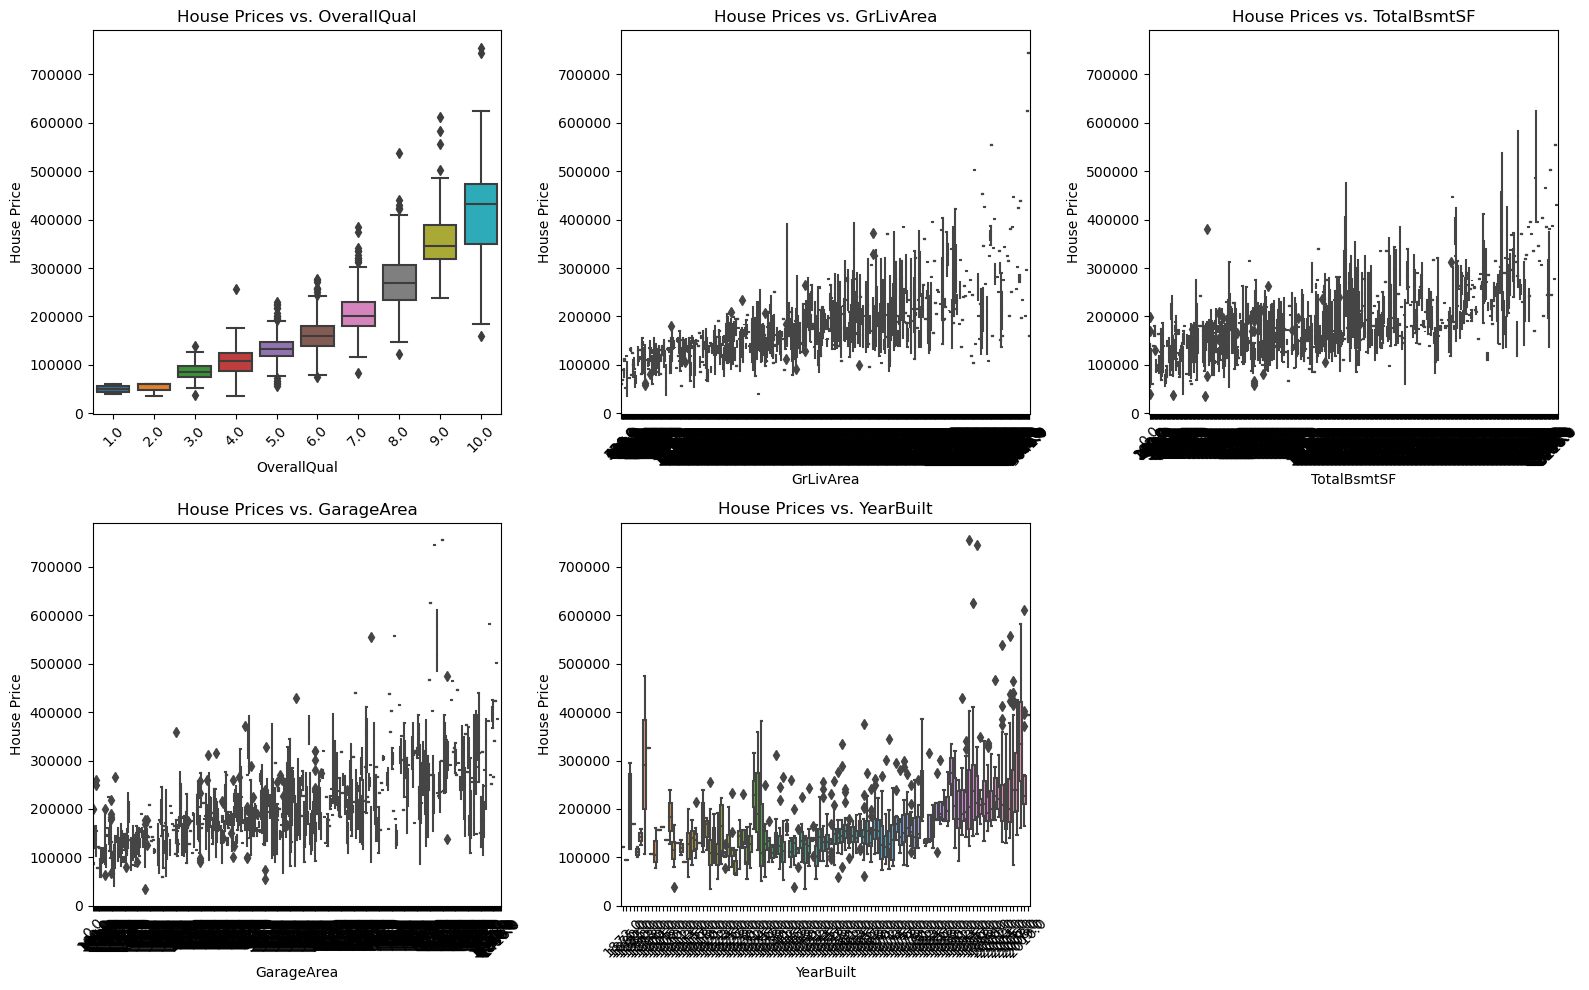

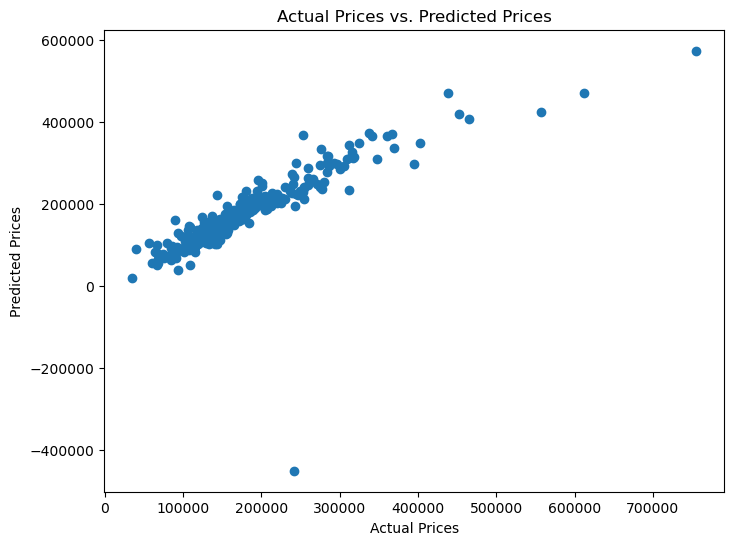

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import seaborn as sns  # Import seaborn

# Load the Boston Housing Dataset
boston = fetch_openml(data_id=42165, as_frame=True)
X = boston.frame.drop(columns=boston.target.name)
y = boston.frame[boston.target.name]

# Identify categorical columns (columns with dtype 'object')
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Handle missing values in the dataset
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Create countplots to visualize the distribution of multiple categorical columns
columns_to_visualize = ['MSZoning', 'LandContour']  # Replace with the actual column names you want to visualize

# Create subplots for each column
plt.figure(figsize=(14, 6))
for i, column in enumerate(columns_to_visualize):
    plt.subplot(1, len(columns_to_visualize), i + 1)
    sns.countplot(data=X, x=column, palette='Set3')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Distribution of '{column}' Categories")
    plt.xticks(rotation=45)

plt.tight_layout()

# Create box plots for selected columns vs. house prices
selected_columns = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']

plt.figure(figsize=(16, 10))
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=X_encoded, x=column, y=y)
    plt.xlabel(column)
    plt.ylabel("House Price")
    plt.title(f"House Prices vs. {column}")
    plt.xticks(rotation=45)

plt.tight_layout()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()
